## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [164]:
# выгрузим данные и изучим их
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# выгрузим данные
df_movies = pd.read_csv('mkrf_movies.csv')
df_shows = pd.read_csv('mkrf_shows.csv')
print(df_movies.info())
print(df_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [166]:
df_shows.head(2)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0


In [167]:
df_movies.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"


Объединению таблиц мешает разные типы данных, разберемся, почему они такие

In [168]:
# узнаем количество пропусков в столбце puNumber в обоих таблицах
print(df_movies['puNumber'].isna().sum()) 
print(df_shows['puNumber'].isna().sum())

0
0


In [169]:
# при объединении выходит ошибка со значением "нет" в столбце puNumber датафрейма df_movies
df_movies[df_movies['puNumber']=='нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


в датафрейме df_movies есть единственная строка со значением в столбце puNumber "нет", удалим ее, так как нет и пустых значений

In [170]:
df_movies = df_movies.drop(df_movies.loc[df_movies['puNumber']=='нет'].index) # удалим строку со значением "нет"

In [171]:
df_movies[df_movies['puNumber']=='нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [172]:
# преобразуем столбцы puNumber в один тип int
df_shows['puNumber'] = df_shows['puNumber'].astype(int)
df_movies['puNumber'] = df_movies['puNumber'].astype(int)

In [173]:
print(df_movies.info())
print(df_shows.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: float6

In [174]:
# объеденим все в один общий датафрейм по столбцу puNumber
df = pd.merge(df_movies, df_shows, on='puNumber', how='outer')
display(df.head(2))
df.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

У нас получился датафрейм, который содержит 16 столбцов и 7485 строк. Данные хранятся в трех форматах: float64, int32, object. В данных есть пропуски.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Начнем со столбцов имеющих тип float64

In [175]:
df['box_office'].value_counts()

box_office
0.00           24
200.00         13
300.00         12
360.00          9
500.00          8
               ..
60531051.94     1
2060823.00      1
1544985.50      1
322284.00       1
219569.00       1
Name: count, Length: 2938, dtype: int64

In [176]:
# Сохраним в переменную columns_float названия столбцов с данными в формате 'float'
columns_float = df.select_dtypes('float64').columns
# Выведем эти столбцы на экран
df[columns_float].sort_values(by='budget', ascending=False).head()

,refundable_support,nonrefundable_support,budget,box_office
7113,180000000.0,90000000.0,2.305074e+09,3.335971e+08
5436,110000000.0,190000000.0,1.032906e+09,5.117755e+08
7463,100000000.0,400000000.0,9.800000e+08,7.177032e+08
7473,100000000.0,400000000.0,9.440000e+08,NaN
7170,0.0,60000000.0,7.799420e+08,5.424320e+07


In [177]:
tmp = df[columns_float].describe()
# преобразуем refundable_support, nonrefundable_support, budget, box_office в более понятный глазу вид
def convert_format(data):
    return '{:.0f}'.format(data)
tmp[['refundable_support', 'nonrefundable_support', 'box_office', 'budget']] = tmp[['refundable_support', 'nonrefundable_support', 'box_office', 'budget']].applymap(convert_format)
tmp

,refundable_support,nonrefundable_support,budget,box_office
count,332,332,332,3158
mean,11864458,48980989,127229717,76478696
std,24916555,59980118,188588333,240353123
min,0,0,0,0
25%,0,25000000,42000000,86239
50%,0,30000000,68649916,2327988
75%,15000000,40375000,141985320,23979671
max,180000000,400000000,2305074303,3073568691


В целом видно, что большинство данных представляют из себя целые числа.

Следовательно, они хранятся в формате float из-за того, что имеют внутри пропуски.

Чтобы понять, можем ли мы заменить пропуски на 0, нужно разобраться в их причине.

Из исходных данных мы знаем, что значение в столбце budget указано только для фильмов, получивших государственную поддержку. Следовательно, если государственная поддержка не получена, то и в budget и в refundable_support, nonrefundable_support будут храниться пропуски.

Следовательно, в столбцах budget, refundable_support, nonrefundable_support мы можем заполнить пропуски 0 и преобразовать их в формат int.

Что касается столбца box_office, то здесь причина пропусков может состоять в том, чтоф фильм не выходил в прокат в кинотеатрах, а вышел на ином носителе. Данные box_office взяты из таблицы mkrf_shows, а она в свою очередь содержит лишь данные о показах фильмов в российских кинотеатрах.

Проверим, точно ли совпадают все пропуски в столбцах budget и financing_source.

In [178]:
(df['budget'].isna().all())==(df['financing_source'].isna().all())

True

Изменим формат хранения данных budget, refundable_support, nonrefundable_support на int, предварительно заполнив пропуски нулями.

In [179]:
for i in ['refundable_support', 'nonrefundable_support', 'budget']:
    df[i] = df[i].fillna(0).astype(int)

In [180]:
# проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     7485 non-null   int32  
 10  nonrefundable_support  7485 non-null   int32  
 11  budget                 7485 non-null   int32  
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [181]:
# преобразуем show_start_date в более понятный формат
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.strftime('%Y-%m-%d')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     7485 non-null   int32  
 10  nonrefundable_support  7485 non-null   int32  
 11  budget                 7485 non-null   int32  
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Тип object

In [183]:
df.select_dtypes('object').head(1)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,financing_source,ratings,genres
0,Открытый простор,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,7.2,"боевик,драма,мелодрама"


In [184]:
for i in df.select_dtypes('object').columns:
    print(i, len(df[i].unique()))
    print(df[i].unique())
    print('---'*50)

title 6771
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
------------------------------------------------------------------------------------------------------------------------------------------------------
show_start_date 1964
['2015-11-27' '2016-09-13' '2016-10-10' ... '2019-12-24' '2019-12-28'
 '2019-12-30']
------------------------------------------------------------------------------------------------------------------------------------------------------
type 8
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
------------------------------------------------------------------------------------------------------------------------------------------------------
film_studio 5491
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Прода

Столбцы, с количеством уникальных значений менее 10 можно привести к категориальному формату.

Столбцы:

* show_start_date - следует преобразовать к формату datetime
* type, age_restriction, financing_source - можно преобразовать к категориальному типу.
* Столбцец ratings - можно преобразовать к формату float, предварительно предобработав.

Преобразуем show_start_date к формату datetime

In [185]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')

Преобразуем type к категориальному типу

Прежде очистим от неявных дубликатов

In [186]:
df['type'] = df['type'].str.strip().astype('category')

Преобразуем age_restriction к категориальному типу

In [187]:
df['age_restriction'] = df['age_restriction'].astype('category')

Преобразуем financing_source к категориальному типу

Сократим названия источников финансирования для удобства восприятия на графиках.

* 'Министерство культуры' - "МК"
* 'Фонд кино' - "ФК"
* 'Министерство культуры, Фонд кино' - "МК, ФК"
* Пропуски заполним строкой 'None'

In [188]:
rename_sourse = {'Министерство культуры': "МК", 'Фонд кино': "ФК", 'Министерство культуры, Фонд кино': "МК, ФК"}
df['financing_source'] = df['financing_source'].apply(lambda x: rename_sourse.get(x, 'None'))
df['financing_source'] = df['financing_source'].astype('category')

Преобразуем ratings к типу float.

Возьмем любой фильм и проверим гипотезу.
Фильм "Колесо времени", сериал, рейтинг ожидания 98%. Видимо дата премьеры была перенесена, так как на сайте кинопоиска дата выхода указана 2021 год. При этом мы видим, что какие-то сборы фильм получить уже успел (может быть, в результате предпоказа). [Источник](https://ru.wikipedia.org/wiki/Колесо_времени_(телесериал))

Возмем другой фильм (сериал) - "Анна Каренина. Интимный дневник". Фильм уже в прокате, однако рейтинг для него не указан в связи с недостатком голосов. [Источник](https://www.kinopoisk.ru/film/953410/)

Так или иначе, мы точно знаем, что рейтинг взят с Кинопоиска. И если стоят значения в процентах, значить рейтинг для данного фильма на момент выгрузки данных сформирован еще не был. Следовательно, мы можем смело заменить данные значения на nan

In [189]:
print('Количество строк с пропусками в столбце `ratings`:', df.ratings.isna().sum())

Количество строк с пропусками в столбце `ratings`: 966


Заполним строки, в которых встречается знак процента на nan

In [190]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').astype('float')
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   category      
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   category      
 9   refundable_support     7485 non-null   int32         
 10  nonrefundable_support  7485 non-null   int32         
 11  budget                 7485 non-null   int32         
 12  financing_source       7485 non-null   category      
 13  rat

На данном этапе мы:

* Преобразовали формат хранения даннных в столбцах refundable_support, nonrefundable_support, budget к формату int
* Столбец show_start_date привели к формату datetime, оставив только дату.
* Столбцы type, age_restriction, financing_source привели к категориальному типу, предварительно избавившись от неявных дубликатов и предобработав сами значения столбцов.
* Cтолбец ratings привели к формату float, изменив все значения, которые не указывают на рейтинг фильма к nan

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Создадим табличку, в которой сохраним названия столбцов с пропусками, а также их количество и процент от общего количества строк

In [192]:
nan_columns = df.columns[df.isna().sum() > 1]
# Создадим датафрейм, в котором отобразим список столбцов с пропущенными значениями, их количество.
nan_columns_count = pd.DataFrame(df[nan_columns].isna().sum(), columns=['count'])    

# И также отобразим их долю от общего количества строк.
nan_columns_count['% of all'] = nan_columns_count['count'] / df.shape[0]

nan_columns_count = nan_columns_count.reset_index() #сбросим индекс
nan_columns_count.columns = ['column', 'count', '% of data'] #переименуем стобцы

print(f'Количество столбцов с пропущенными значениями: {len(nan_columns)}')

# Выведем таблицу в порядке убывания количества пропущенных значений
nan_columns_count = nan_columns_count.sort_values(by='count', ascending=False)
nan_columns_count

Количество столбцов с пропущенными значениями: 7


,column,count,% of data
6,box_office,4327,0.578090
4,ratings,995,0.132933
5,genres,975,0.130261
3,producer,568,0.075885
0,film_studio,18,0.002405
2,director,9,0.001202
1,production_country,2,0.000267


Столбец ratings

In [193]:
print(f'Столбец {nan_columns_count.iloc[0,0]} содржит {nan_columns_count.iloc[0,1]} пропусков, что составляет {(nan_columns_count.iloc[0,2]*100).round(2)}% от отбщего объема')

Столбец box_office содржит 4327 пропусков, что составляет 57.81% от отбщего объема


Столбец ratings содержит 996 пропусков, что составляет 13.3% от общего объема данных

Ранее, мы уже выяснили, что в данном стобце появились пропуски вероятнее всего по нескольким причинам:

* Фильм еще не вышел на экраны, и в данных присутвовали либо пропуски, либо т.н. "рейтинг ожидания", который мы также заменили на пропуски.
* Фильмы, которые вышли в прокат, но в связи с низким количеством рецензий рейтинг для них еще не сформировался.

Пропуски в полях о жанре фильма, режиссере и источнике финансирования, продюсере, стране-производителе и студии мы не можем заполнить, поэтому заполним их значением unknown, чтобы не потрять данные:

Столбец genres

In [194]:
print(f'Столбец {nan_columns_count.iloc[1,0]} содржит {nan_columns_count.iloc[1,1]} пропусков, что составляет {(nan_columns_count.iloc[1,2]*100).round(2)}% от отбщего объема')

Столбец ratings содржит 995 пропусков, что составляет 13.29% от отбщего объема


In [195]:
# Заполним пропуски в столбце 'genres' значением 'Unknown'
df['genres'] = df.genres.fillna('Unknown')

# Проверим оставшееся колличество пропусков в столбце 'genres' после заполнения.
df['genres'].isna().sum()

0

Столбец producer

In [196]:
print(f'Столбец {nan_columns_count.iloc[2,0]} содржит {nan_columns_count.iloc[2,1]} пропусков, что составляет {(nan_columns_count.iloc[2,2]*100).round(2)}% от отбщего объема')

Столбец genres содржит 975 пропусков, что составляет 13.03% от отбщего объема


In [197]:
# Заполним пропуски в столбце 'producer' значением 'None'
df['producer'] = df.producer.fillna('None')

# Проверим оставшееся колличество пропусков в столбце 'producer' после заполнения.
df['producer'].isna().sum()

0

Столбец film_studio

In [198]:
print(f'Столбец {nan_columns_count.iloc[3,0]} содржит {nan_columns_count.iloc[3,1]} пропусков, что составляет {(nan_columns_count.iloc[3,2]*100).round(2)}% от отбщего объема')

Столбец producer содржит 568 пропусков, что составляет 7.59% от отбщего объема


In [199]:
# Заполним пропуски в столбце 'film_studio' значением 'None'
df['film_studio'] = df['film_studio'].fillna('None') 

# Проверим оставшееся колличество пропусков в столбце 'film_studio' после заполнения.
df['film_studio'].isna().sum() 

0

Столбец director

In [200]:
print(f'Столбец {nan_columns_count.iloc[4,0]} содржит {nan_columns_count.iloc[4,1]} пропусков, что составляет {(nan_columns_count.iloc[4,2]*100).round(2)}% от отбщего объема')

Столбец film_studio содржит 18 пропусков, что составляет 0.24% от отбщего объема


In [201]:
# Заполним пропуски в столбце 'director' значением 'None'
df['director'] = df.director.fillna('None')

# Проверим оставшееся колличество пропусков в столбце 'director' после заполнения.
df['director'].isna().sum()

0

Столбец production_country

In [202]:
print(f'Столбец {nan_columns_count.iloc[5,0]} содржит {nan_columns_count.iloc[5,1]} пропусков, что составляет {(nan_columns_count.iloc[5,2]*100).round(2)}% от отбщего объема')

Столбец director содржит 9 пропусков, что составляет 0.12% от отбщего объема


In [203]:
df[df.production_country.isna()].title.unique()

array(['Детский юмористический киножурнал "Ералаш. Ну просто фантазтика!"',
       'Мульт личности. Выпуск 5'], dtype=object)

Причина пропуска плохо понятна. Видимо в источнике, с которого были взяты данные Министерством курльтуры по какой-то причине для этих картин отсутствовало значение в графе "Страна производства"

Пропущенные значения в данных строках в столбце production_country можно смело заполнить значением "Россия"`

In [204]:
# Заполним пропуски в столбце 'production_country' значением 'Россия'
df['production_country'] = df.production_country.fillna('Россия')

# Проверим оставшееся колличество пропусков в столбце 'production_country' после заполнения.
df['production_country'].isna().sum()

0

In [205]:
df.columns[df.isna().sum() > 1]

Index(['ratings', 'box_office'], dtype='object')

На данном этапе мы изучили причины пропусков в столбцах датафрейма и частично их заполили.
Мы заполнили:

* Пропуски в genres - - значением 'Unknone'
* Пропуски в producer - значением 'None'
* Пропуски в film_studio - значением 'None'
* Пропуски в director - значением 'None'
* Пропуски в production_country - значением "Россия"

Мы оставили пропуски в столбцах:

* ratings

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [206]:
df.duplicated().sum()

0

Полностью дублирующиеся строки в данных отсутствуют.

Часть столбцов мы проверим на наличие явных дубликатов:
* title
* film_studio
* production_country
* director
* producer
* genres

Часть столбцов мы проверим на наличие неявных дубликатов:
* puNumber
* title

Исследуем столбцы на наличие неявных дубликатов

Чтобы исследовать столбцы на наличие лишних пробелов до или после слова, сравним количество уникальных значений в исходном столбце и в столбце

In [207]:
dupl_list = ['title', 'film_studio', 'production_country', 'director', 'producer', 'genres']

In [208]:
del_list = [] # Создадим список, в который добавим названия столбцов, нуждающихся в очищении от пробелов.

for i in dupl_list:
    print(f'Уникальных значений в исходном столбце {i}: {df[i].nunique()}, после предобработки: {df[i].str.strip().nunique()}')
    print('-------------------------------')
    if df[i].nunique() > df[i].str.strip().nunique():
        del_list.append(i)
print(del_list)

Уникальных значений в исходном столбце title: 6771, после предобработки: 6771
-------------------------------
Уникальных значений в исходном столбце film_studio: 5491, после предобработки: 5463
-------------------------------
Уникальных значений в исходном столбце production_country: 950, после предобработки: 934
-------------------------------
Уникальных значений в исходном столбце director: 4812, после предобработки: 4802
-------------------------------
Уникальных значений в исходном столбце producer: 5350, после предобработки: 5335
-------------------------------
Уникальных значений в исходном столбце genres: 743, после предобработки: 743
-------------------------------
['film_studio', 'production_country', 'director', 'producer']


Очистим значения, хранящиеся в столбцах из списка del_list от лишних пробелов

In [209]:
for i in del_list:
    df.loc[:, i] = df[i].str.strip()

In [210]:
# Создадим спискок, в который добавим все столбцы, данные в которых все еще нуждаются в очистке от пробелов
del_list_after = [] 

# Проверим остались ли необработанные столбцы
for i in del_list:
    if df[i].nunique() > df[i].str.strip().nunique():
        del_list_after.append(i)

# Вновь выведем список названий столбцов, нуждающихся в предобработке.
print(del_list_after) 

[]


Мы полчили пустой список, что говорит о том, что все необходимые столбцы мы очистили от лишних пробелов, избавившись тем самым от неявных дубликатов.

Исследуем столбцы на наличие явных дубликатов

Исследуем столбец puNumber

In [211]:
df.duplicated(subset=['puNumber']).sum()

2

In [212]:
df[df.duplicated(subset=['puNumber'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,None,7.6,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,None,6.8,"комедия,криминал",NaN


Для номеров 221154310 и 221054410 нашлись дублирующиеся значения.

Исследуем каждый из них по отдельности, чтобы понять причину.

Ниже представлены фильмы, номер прокатного удостоверения которых - 221154310

In [213]:
df.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,0,None,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,None,7.6,"драма,мелодрама,история",NaN


Ниже представлены фильмы, номер прокатного удостоверения которых - 221054410

In [214]:
df.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,0,None,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,None,6.8,"комедия,криминал",NaN


Можно заметить, что неявные дубликаты пристуствуют и в иной форме - в форме разного написания. К примеру в столбце director "ХЭрольд Рэмис" и "Гарольд Реймис" - один и тот же человек, но фамилия написана разными способами. Можно предположить, что такая проблема может встретиться и в столбцах film_studio, producer

В первом случае, это совершенно разные фильмы. Во втором - это первая и вторая части фильма, однако также две разные кинокартины.
В данных ошибки нет, так как при проверке в [реестре](https://opendata.mkrf.ru/opendata/7705851331-register_movies) запрос показал точно такие же результаты.

Причина, по которой один и тот же номер прокатного удостоверения может быть выдан совершенно разным фильмам, с разными студиями производства - не ясна.

Исследуем столбец title

In [215]:
df.duplicated(subset=['title']).sum()

714

В столбце title содержится 714 дубликатов.

Посмотрим, для названий каких фильмов в данных есть дубликаты.

Посмотрим на количество уникальных значений в срезе с дублирующимися названиями фильмов.

In [216]:
df[df.duplicated(subset=['title'])].title.nunique()

558

Итак, для 558 фильмов в наших данных нашлось хотя бы по одному дубликату. Возьмем некоторые из них случайным образом и изучим.

Посмотрим на 10 уникальных значений столбца title из среза с дубликатами.

In [217]:
df[df.duplicated(subset=['title'])].title.unique()[:10]

array(['Особо опасен', 'Алекс и Эмма',
       'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/',
       'Гарри Поттер и узник Азкабана /По роману Дж.К.Ролинг/',
       'Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/',
       'Джейн Эйр /По одноименному роману Шарлотты Бронте/',
       'Кинг Конг _', 'Пуленепробиваемый.',
       'Рапунцель: Запутанная история', 'Дом грёз'], dtype=object)

In [218]:
df.query('title == "Особо опасен"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,None,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,None,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,None,6.8,"фантастика,боевик,триллер",NaN


Разные номера прокатных удостоверений. Разные сборы в кинотеатрах. Разные даты релиза

Видимо причина, по которой дублируются фильмы состоит в том, что компания, владеющая правами на фильм, осуществляла релиз одного и того же фильма в разные периоды времени. В результате, фильмы получают иной номер прокатного удостоверения, иную дату релиза. И как следствие, различные сборы.

Фильмы, для которых сборы в кинотеатрах не указаны, могли выпускаться на иных носителях. Для таких фильмов также могу присутсвовать дубли, так как для одного и того же фильма могу быть разные прокатные удостоверения для разных носителей.

В данном случае, имеет смысл оставить дубликаты в таблице. Когда мы будем анализировать фильм, важно помнить, что на самом деле мы анализируем определенную версию фильма, выпущенную на определенном носителе в определенный период времени. Один и тот же фильм может пользовать различным успехом в разные года (например, когда дело будет касаться анализа бюджетных сборов).

Итог:

При исследовании дубликатов, мы столкнулись с несколькими проблемами:

* Неявные дубликаты встречались в виде строк, с лишними пробелами до / после слова
* Неявные дубликаты также встречались в виде разного написания одного и того же слова (к примеру, в отношении иностранных фамилий: "ХЭрольд Рэмис" и "Гарольд Реймис"). Такие дубликаты на данном мы оставили без изменений

Что касается явных дубликатов, они обнаружились в столбцах puNumber и title.

* Для того, чтобы установить причину появления дубликатов в столбце puNumber нам оказалось недостаточно имеющихся данных.
* Причина появления дубликатов в столбце title может быть связана с тем, что один и тот же фильм получал разные прокатные удостоверений для релиза фильма в разное время и на разных носителях

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   category      
 4   film_studio            7485 non-null   object        
 5   production_country     7485 non-null   object        
 6   director               7485 non-null   object        
 7   producer               7485 non-null   object        
 8   age_restriction        7485 non-null   category      
 9   refundable_support     7485 non-null   int32         
 10  nonrefundable_support  7485 non-null   int32         
 11  budget                 7485 non-null   int32         
 12  financing_source       7485 non-null   category      
 13  rat

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

На основании вышепроведенного анализа и предпринятых шагов по предобработке данных были выявлены следующие проблемы:

* Во многих категориальных столбцах (type, film_studio, production_country, director, producer) встречались лишние пробелы вначале и в конце строки, что приводило к появлению неявных дубликатов в данных столбцах.
* В столбце director присутвуют одинаковые значения с разным написанием (пример: "ХЭрольд Рэмис" и "Гарольд Реймис" - один и тот же человек, но фамилия написана разными способами). Можно предположить, что такая проблема может встретиться и в столбцах film_studio, producer.

#### Шаг 2.5. Проверьте количественные значения

* Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


In [220]:
df.select_dtypes(['int', 'float']).head()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
0,221048915,0,0,0,7.2,NaN
1,111013716,0,0,0,6.6,NaN
2,221038416,0,0,0,6.8,NaN
3,221026916,0,0,0,6.8,NaN
4,221030815,0,0,0,6.8,NaN


Изучим значения столбцов:

- box_office
- refundable_support
- nonrefundable_support
- budget
- ratings

Столбец box_office

In [221]:
df.box_office.describe().apply("{:,.0f}".format)

count            3,158
mean        76,478,696
std        240,353,123
min                  0
25%             86,239
50%          2,327,988
75%         23,979,671
max      3,073,568,691
Name: box_office, dtype: object

Всего сборы указаны для 3158 фильмов

Средний сбор - 76,5млн.р. При этом 50% значений лежат ниже цифры в 2,372,988. Стандартное отклонение от среднего составляет 240,3 млн.р. Это очень большой разброс значений.
Такое отклонение и такое разброс может быть вызван очень большим диапазоном: минимальный сбор составляет 0, в то время как максимальный - 3 млрд.р.

Посмотрим как выглядит диаграмма разброса.

<Axes: >

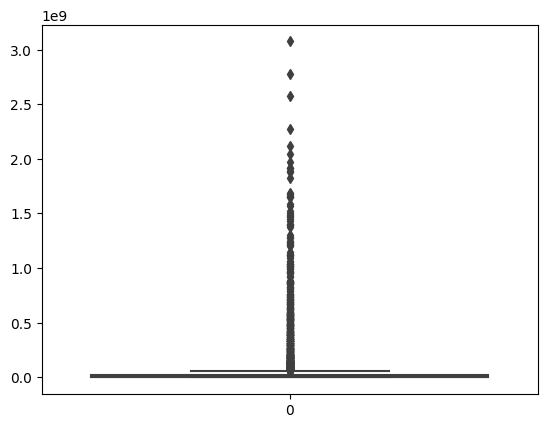

In [222]:
sns.boxplot(df['box_office'])

Хорошо видно большое количество выбросов в стороне больших значений.

Посмотрим на аномально выcокие значения (например фильмы, которые собрали более 2-х млрд.р.)

In [223]:
df.query('box_office > 2*10**9').head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2858,Зверополис,124000316,2016-02-15,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,0,0,0,None,8.3,"мультфильм,комедия,криминал",2.048126e+09
3487,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,0,0,0,None,6.6,"фэнтези,боевик,комедия",2.118396e+09
5652,Движение вверх,111011817,2017-12-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0,400000000,590192191,ФК,7.5,"спорт,драма",2.779686e+09


В больших значениях в данном случае нет ничего подозрительного. Судя по всему это действительно фильмы, которые имели достаточно высокие кассовые сборы.

Теперь посмотрим, что представляют из себя строки с аномально низкими значениями.

In [224]:
df.query('box_office < 10000').tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5379,ШПИОН,111009411,2011-12-09,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,0,0,0,None,7.1,"боевик,комедия,криминал",5405.0
5387,ВОИН.com,111004411,2011-07-04,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,0,0,0,None,4.7,комедия,465.0
5388,Кунг-фу Панда 2.,224021411,2011-11-15,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,0,0,0,None,7.4,"мультфильм,фэнтези,боевик",9270.0
6580,Время собирать цветы,112025118,2019-01-01,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,«12+» - для детей старше 12 лет,0,0,0,None,NaN,Unknown,7175.0
6803,Счастье - это...Часть 2,111005319,2019-03-20,Художественный,"ООО ""Компания Парк Синема"", ООО ""ФильмФест""",Россия,"А.Боровикова, Е.Войтович, З.Джиджилава, А.Тимо...","ООО ""Уолт Дисней Компани СНГ""",«6+» - для детей старше 6 лет,0,0,0,None,6.0,"семейный,мелодрама",4398.4


Кунг Фу Панда.Этот фильмы не мог собрать так мало. Побробуем обратиться к гугл и выяснить в чем причина.

"Кунг-фу Панда 2" по данным из гугл собрал около 900 млн рублей ($36 млн. по курсу 2011 года). Получается, что значения указаны сотнях тысяч.
Отсюда отчасти может быть искажение диаграммы разброса. Возможно, если бы значения были верные, то часть более высоких сумм не определялась бы как выброс.

Однако нельзя не допускать того факта, что действительно могли найтись фильмы, получившие низкие кассовые сборы.

Посмотрим так же на фильмы, которые получили нулевые сборы.

In [225]:
df.query('box_office == 0').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,None,«6+» - для детей старше 6 лет,0,0,0,None,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,None,«12+» - для детей старше 12 лет,0,0,0,None,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,0,0,0,None,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0,0,0,None,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,0,0,0,None,7.4,"аниме,мультфильм,драма",0.0


In [226]:
print('Всего фильмов, получивших нулевые сборы', df.query('box_office == 0').shape[0])

Всего фильмов, получивших нулевые сборы 24


Может быть, на часть этих фильмов и правда никто не пришел, а может быть быть они по какой-то иной причине не были указаны. Посмотрим данные еще глубже. Посмотрим на распределение данных по квантилям.

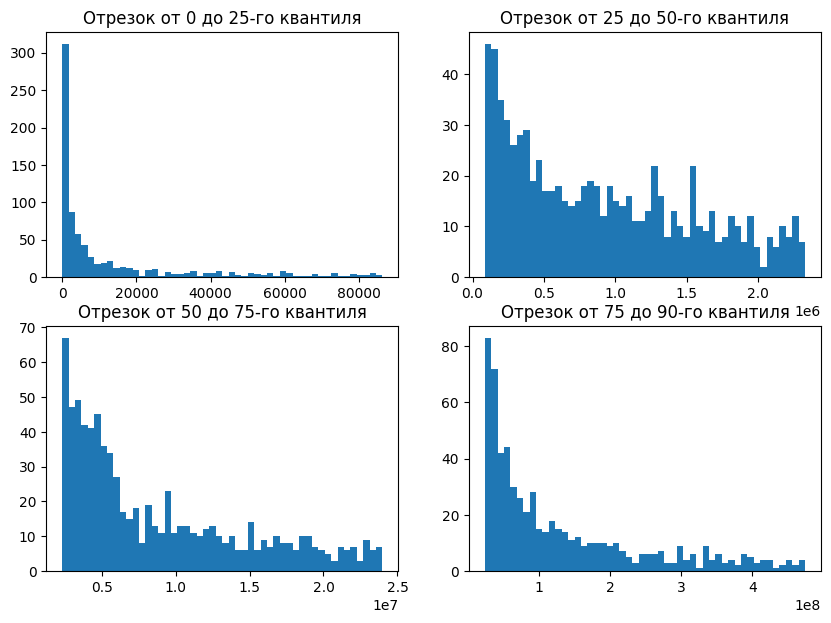

In [227]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(7)

ax1.hist(x=df['box_office'], bins=50, label ='1', range=(0, df['box_office'].quantile(.25)))
ax1.set_title('Отрезок от 0 до 25-го квантиля')

ax2.hist(x=df['box_office'], bins=50, range=(df['box_office'].quantile(.25), df['box_office'].quantile(.50)))
ax2.set_title('Отрезок от 25 до 50-го квантиля')

ax3.hist(x=df['box_office'], bins=50, range=(df['box_office'].quantile(.50), df['box_office'].quantile(.75)))
ax3.set_title('Отрезок от 50 до 75-го квантиля')

ax4.hist(x=df['box_office'], bins=50, range=(df['box_office'].quantile(.75), df['box_office'].quantile(0.95)))
ax4.set_title('Отрезок от 75 до 90-го квантиля')
plt.show()

Распределения по отрезкам похожи. Разве что на первом графике, на значении 10000 словно происходит некий излом, и затем график начинает вести себя более плавно. Посмотрим, как бы выгляждело распределение на отрезке 10000, до 25-го квантиля

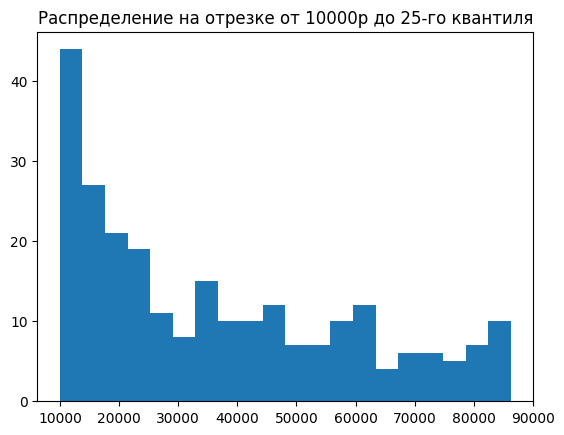

In [228]:
plt.hist(x=df.box_office, 
         bins=20,
         range=(10000, df['box_office'].quantile(.25)));
plt.title('Распределение на отрезке от 10000р до 25-го квантиля');

В такой форме оно действительно больше похоже на остальные 3 распределения.

Оно также похоже на предыдущие распределения. Получается, даже если разбить распределение на отрекзки, они в целом будут похожи по форме друг на друга.

Посмотрим, какую долю составляют фильмы, набравшие менее 10000 р сборов.

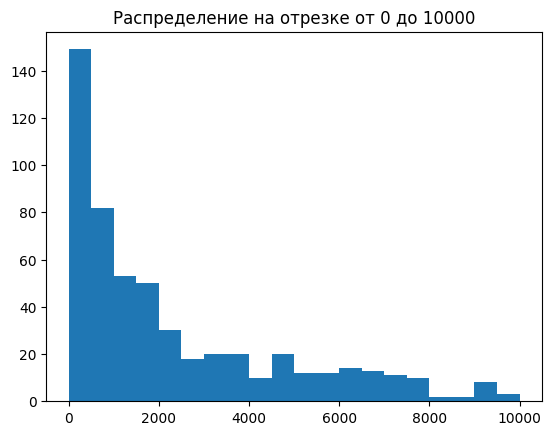

In [229]:
plt.hist(x=df.box_office, 
         bins=20,
         range=(0, 10000));
plt.title('Распределение на отрезке от 0 до 10000');

In [230]:
df.query('box_office < 10000').box_office.notna().shape[0] / df.box_office.notna().shape[0]*100

7.2010688042752165

Они составляют 7% от общего количество данных, для которых сборы указаны.

Нам удалось найти подозрительно низкие значения в данном столбце и мы смогли установить их причину - в большинстве случаев, это неверно указанные единицы измерения. Однако найти какую-то четкую границу, по которой их можно было бы отделить - не удалось.

Столбцы refundable_support и nonrefundable_support

В данном случае, разумно будет взять срез данных, в который включены фильмы, профинансированные государством.

In [231]:
tmp_df_refundable = df.query('financing_source != "None"')
tmp_df_refundable = tmp_df_refundable.query('nonrefundable_support != "None"')
tmp_df_refundable.describe()[['refundable_support', 'nonrefundable_support']].astype(int)

,refundable_support,nonrefundable_support
count,332,332
mean,11864457,48980988
min,0,0
25%,0,25000000
50%,0,30000000
75%,15000000,40375000
max,180000000,400000000
std,24916555,59980117


Посмотрим на срез данных, которые не включают в себя нулевые значения по обоим столбцам.

In [232]:
tmp_df_refundable_null_1 = df.query('financing_source != "None" and refundable_support != 0').describe()['refundable_support'].astype(int)
tmp_df_nonrefundable_null_2  = df.query('financing_source != "None" and nonrefundable_support != 0').describe()['nonrefundable_support'].astype(int)
tmp_df_refundable_null = tmp_df_refundable_null_1.to_frame().join(tmp_df_nonrefundable_null_2)
tmp_df_refundable_null

,refundable_support,nonrefundable_support
count,111,323
mean,35486486,50345784
min,3500000,3000000
25%,15000000,25000000
50%,25000000,30000000
75%,50000000,45000000
max,180000000,400000000
std,31972875,60243206


Можно заметить, что средний объем невозвратных средств (также как и максимальный) выше объема возвратных средств, выделенных государством на поддержку фильмов.

И помимо того, что суммы были выше, государство выделяло на фильмы невозвратных средств в 3 раза чаще, чем возвратных.

Также, важно не забывать, что были фильмы на которые были выделены и те и другие средства.



In [233]:
round(df.query('financing_source != "None" and refundable_support != 0 and nonrefundable_support != 0').shape[0]/df.query('financing_source != "None"').shape[0],2)*100

31.0

31% фильмов получили поддержку одно временно в виде возвратных и невозвратных средств.


Столбец budget

In [234]:
df.query('financing_source != "None"')['budget'].describe().astype(int)

count           332
mean      113818397
std       191541680
min     -2147483648
25%        41999746
50%        68392403
75%       140010178
max      1032905957
Name: budget, dtype: int32

In [235]:
df.query('budget<0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000,90000000,-2147483648,ФК,5.8,"приключения,фэнтези",3.335971e+08


Имеется одно отрицательное значение -2147483648, сумма бюджета для такого фильма выглядит правдоподобно, заменим его на модуль 

In [236]:
df['budget'] = df['budget'].replace(-2147483648, 2147483648)

Столбец budget включает в себя сумму значений столбцов nonrefundable_support и refundable_support, а также может включать некоторую часть средств, которую авторы фильма привлекли из собственных средств.



Следовательно, столбец budget должен быть не меньше, чем сумма по столбцам nonrefundable_support и refundable_support

Проверим это условие, методом от обратного. Посмотрим, есть ли строки, в которых budget меньше суммы nonrefundable_support и refundable_support

In [237]:
((df['nonrefundable_support']+df['refundable_support'])> df['budget']).sum()

17

Похоже что в 17 случая бюджет фильма меньше, чем объем профинансированных в него средств. Это подозрительно. Посмотрим на строки, в которых это встречается.

In [238]:
null_budget = (df['nonrefundable_support']+df['refundable_support'])> df['budget']

In [239]:
df[null_budget]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"МК, ФК",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,ФК,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,ФК,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,ФК,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,ФК,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,ФК,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,ФК,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,МК,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,ФК,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,ФК,5.6,фантастика,1.038321e+09


Теперь нулевых значений 17. У нас указан объем возвратных и/или невозвратных средств, однако не посчитана общая сумма budget.
Так как мы знаем, что столбец budget представляет из себя сумму возвратных и невозвратных средств (а также личные средства авторов фильма, но в данном случае у нас нет о них никакой информации), возпользуемся имеющимися данными и заполним столбце budget этой суммой.

In [240]:
df.loc[null_budget, 'budget'] = df.loc[null_budget, 'refundable_support'] + df.loc[null_budget, 'nonrefundable_support']

In [241]:
df[null_budget]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,23000000,"МК, ФК",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,75000000,ФК,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,80000000,ФК,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,20000000,ФК,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,160000000,ФК,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,59000000,ФК,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,35000000,ФК,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,6000000,МК,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,70000000,ФК,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,250000000,ФК,5.6,фантастика,1.038321e+09


In [242]:
df.query('financing_source != "None"')['budget'].describe().astype(int)

count           332
mean      130947725
std       181740189
min         6000000
25%        45524799
50%        71196901
75%       150000000
max     -2147483648
Name: budget, dtype: int32

Стандартное отклонение практически в 1,5 раза больше среднего.

Разброс значений бюджетов фильмов составляет от 6 млн до 2,1 млрд. р.

Среднее значение практически в два раза больше медианы, что говорит о том, что встречаются редкие, однако значительно большие чем основная масса данных значения.

75% фильмов имеют бюджет менее 150 млн. р.

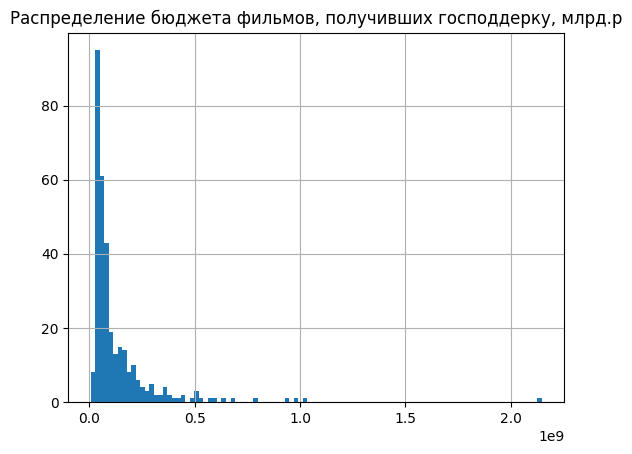

In [243]:
df.query('financing_source != "None"')['budget'].hist(bins=100)
plt.title('Распределение бюджета фильмов, получивших господдерку, млрд.р')
plt.show()

Действительно, на гистограмме виден длинный хвост справа, из за которого среднее арифметическое так сильно смещается относительно медианы.

Столбец ratings

In [244]:
df['ratings'].describe()

count    6490.000000
mean        6.479245
std         1.101665
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

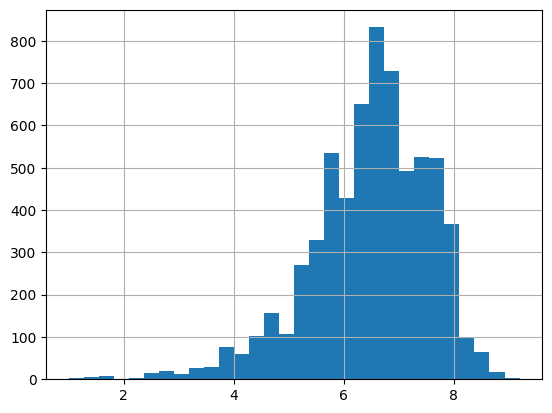

In [245]:
df['ratings'].hist(bins=30)
plt.show()

На гистограмме никаких аномалий нет. Видно, что большинство значений лежит в диапазоне 6 и выше.

Вывод:

В данном разделе мы проверили стобцы, содержащие количественные значения: box_office, refundable_support, nonrefundable_support, budget, ratings.

- В столбце box_office были найдены аномально низкие значения, большая часть из которых былы связана с тем, что значения указывались в неверных единицах измерения. Мы попытались найти порог, ниже которого можно было бы однозначно предполагать ошибку в данных путем изучения распределения данных, однако нам это не удалось. Данные оставили без изменений.
- В столбце refundable_support и nonrefundable_support аномалий не обнаружено. Однако была обнаружена интересная закономерность: невозвратных средств государство выделяло на поддержку больше и чаще, нежели возвратных.
- В столбце budget были обнаружены строки, для которых значения бюджета фильма было меньше, чем сумма возвратного и невозвратного финансирования. Как оказалось, для данных строк сумма бюджета просто была не посчитана. Мы заполнили их соотвуетсвующей суммой, опираясь на имеющиеся данные.
- В столбце ratings, ранее были найдены значения в процентах (которые мы впоследствии заменили на пропуски, так как значение в процентах указывает на отсутсвие рейтинга у фильма). В остальном, в столбце ratings аномалий не найдено.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [246]:
df['show_start_year'] = df['show_start_date'].dt.year

In [247]:
df['show_start_year'].value_counts()

show_start_year
2010    985
2019    930
2018    891
2016    818
2014    806
2015    705
2013    630
2011    622
2012    593
2017    505
Name: count, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [248]:
def new_values_director(row):
    return row['director'].split(',')[0]
    
def new_values_genres(row):
    return row['genres'].split(',')[0]


df['f_genre'] = df.apply(new_values_genres, axis=1)
df['f_director'] = df.apply(new_values_director, axis=1)
df[['f_genre', 'f_director', 'director', 'genres']].head()

,f_genre,f_director,director,genres
0,боевик,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама"
1,драма,Е.Матвеев,Е.Матвеев,"драма,военный"
2,фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер"
3,фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер"
4,фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер"


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

<Axes: >

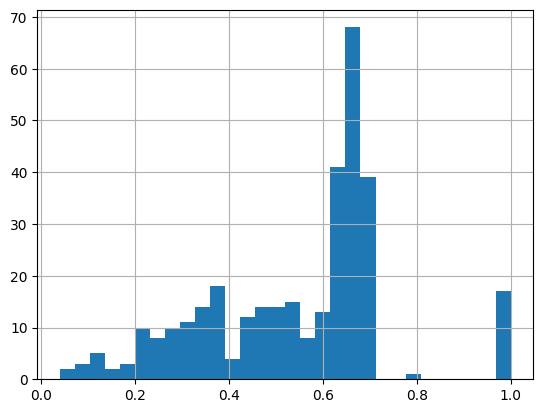

In [249]:
df['support_ratio'] = round((df['refundable_support']+df['nonrefundable_support'])/df['budget'],2)
df['support_ratio'].hist(bins=30)

Можно сделать вывод, что у большиства фильмов господдержка составляет 60-70%, но есть также и фильмы со 100% поддержкой

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [250]:
df_year_movies = df.pivot_table(index='show_start_year', values='show_start_date', aggfunc='count')
df_year_movies

,show_start_date
show_start_year,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


In [251]:
print('Среднее количество фильмов в год:', df_year_movies['show_start_date'].mean())

Среднее количество фильмов в год: 748.5


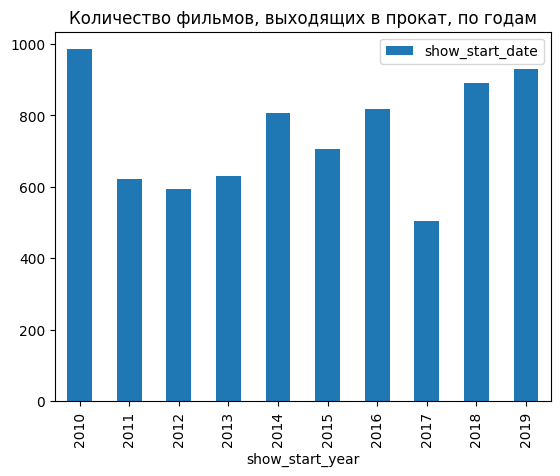

In [252]:
df_year_movies.plot(kind='bar')
plt.title('Количество фильмов, выходящих в прокат, по годам')
plt.show()

В 2010, 2018 и 2019 года было зарегестрировано больше всего фильмов (макисмум 2010 года - 985 фильмов), выходящих в прокат, в 2017 году - меньше всего (505 кинокартин). Однако в целом, не смотря на то, что присутствуют перепады, динамика выхода фильмов в российский кинопрокат равномерная.

In [253]:
df['box_office_na'] = df['box_office'].isna()


In [254]:
print('Доля фильмов, которые вышли в прокат в кинотеатрах от общего количества фильмов, вышедших с 2010 по 2019 года:', round(df['box_office_na'].mean(), 2))

Доля фильмов, которые вышли в прокат в кинотеатрах от общего количества фильмов, вышедших с 2010 по 2019 года: 0.58


Более чем для половины всех фильмов неизвестна сумма сборов. Изучим, как эта доля менялась по годам

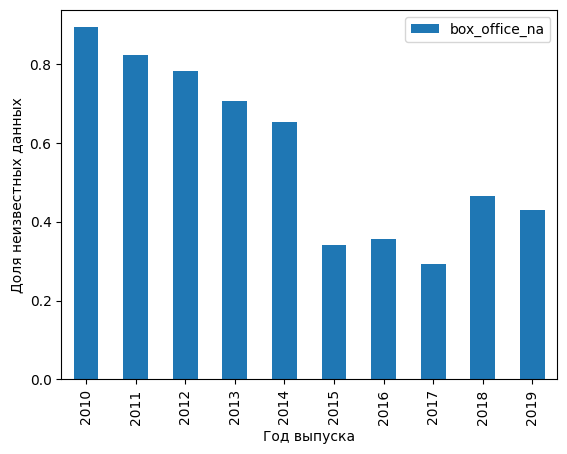

In [255]:
df.pivot_table(index='show_start_year', values='box_office_na', aggfunc='mean').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Доля неизвестных данных')
plt.show()

Как видно из графика, в период с 2010 по 2014 год отсутствующие данные составляли большую часть - 65-90%. Начиная же с 2015 года, данные становятся более полными - отсутствуют не более 35% данных о сборах.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

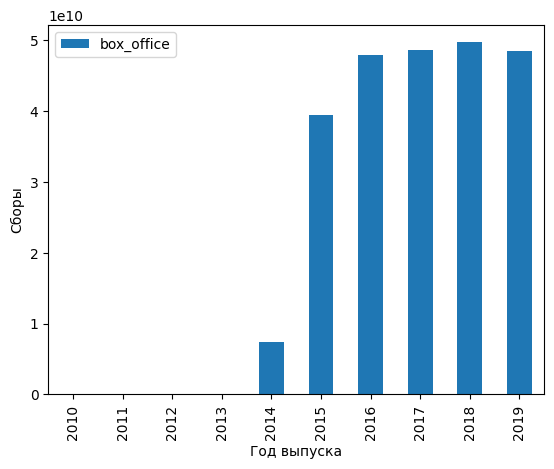

In [256]:
df.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Сборы')
plt.show()

Из графика видим, что наименьшие суммы сборов были в период с 2010 до 2013 год - однако, скорее всего это связано в выявленной выше неполнотой и аномалиями в данных за этот промежуток времени.

Резкий рост видим с 2014 до 2016 года, далее после 2017 сумма сборов практически не меняется.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Создадим сводную таблицу, в которой отбразим среднее и медианнные значения сборов для 2015-2019 годов. 

In [257]:
df_mm_box_office = df.query('show_start_year>=2015').pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', "median"]).astype(int)
df_mm_box_office.columns = ['mean', 'median']
df_mm_box_office

,mean,median
show_start_year,,
2015,84940570,4920933
2016,91000569,3846679
2017,136032793,9968340
2018,104565059,8891102
2019,91369261,4627798


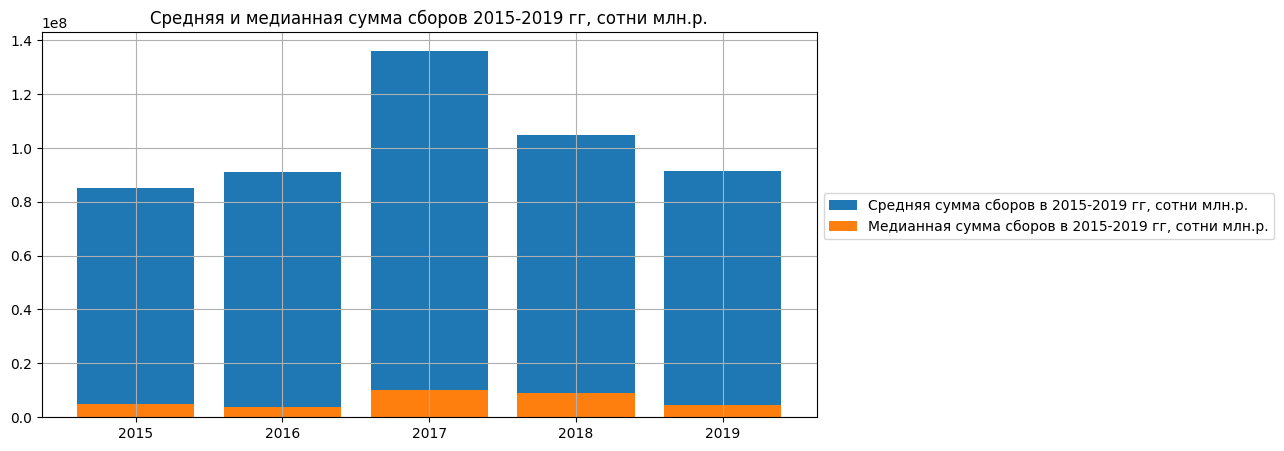

In [258]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5))

ax1.bar(x=df_mm_box_office.index, height=df_mm_box_office['mean'], label='Средняя сумма сборов в 2015-2019 гг, сотни млн.р.')
ax1.bar(x=df_mm_box_office.index, height=df_mm_box_office['median'], label='Медианная сумма сборов в 2015-2019 гг, сотни млн.р.')

ax1.set_title('Средняя и медианная сумма сборов 2015-2019 гг, сотни млн.р.')
ax1.set_xticks(df_mm_box_office.index)
ax1.grid()
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Невооруженным вглядом видна большая разница между медианными и средним количеством сборов.
Это можно объяснить тем, что в один и тот же год может выйти как обыкновенный фильм, так и "бестселлер".
Мы специально не очищали данные от выбросов в столбце "сумма сборов", так как нам важно видеть, в какие года выходили такие бестселлеры и учитывать их.
Если же мы хотим знать средние сборы, характерные для большинства фильмов выборки, то мы можем посмотреть на значение медианы, так как она более устойчива к выбросам.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

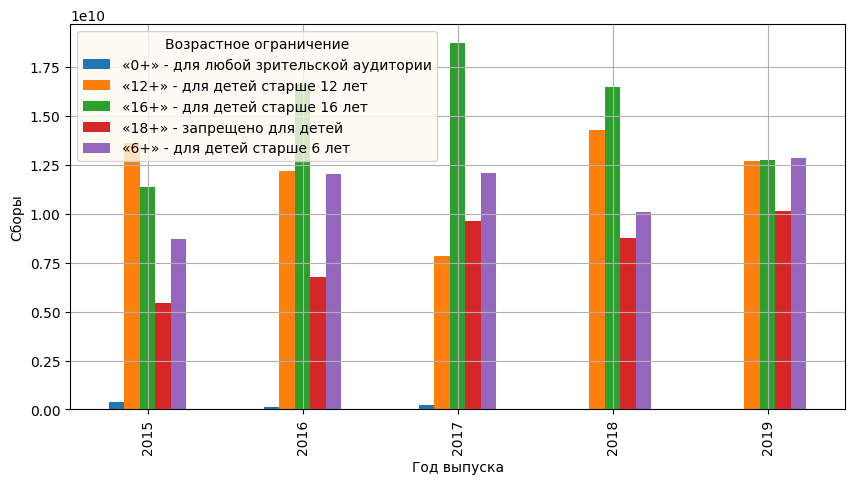

In [259]:
df_age_box_office = df.query('show_start_year>=2015').pivot_table(index='age_restriction',columns='show_start_year', values='box_office', aggfunc='sum').transpose()
df_age_box_office.plot(kind='bar', grid=True, figsize=(10,5))
plt.xlabel('Год выпуска')
plt.ylabel('Сборы')
plt.legend(title = 'Возрастное ограничение', facecolor = 'floralwhite')
plt.show()

Как видно из графика, практически всегда самые большие сборы были у фильмов с категорией 16+, за исключением 2015 года - здесь впереди категория 12+, и 2019 года - самой кассовой оказалась категория 6+. Это может быть связано с тем, что эти категории охватывают самую большую группу людей - такие фильмы подходят и для подростков и для взрослых. Возможно, в этих годах выходило больше фильмов с таким возрастным ограничением. В категории 0+ выходит совсем немного фильмов, поэтому и суммарные сборы соотвественно небольшие.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

- Какое количество фильмов получало господдержку ежегодно.
- Каковы средние показатели и распределение денежных средств, которое государство выделяло на фильмы.
- Как распределена поддержка между Фондом Кино и Министерством Культуры.
- Какую долю в среднем составляют государственные средства в общем бюджете фильма.
- Зависит ли сумма сборов от размера государственной поддержки?
- Существует ли зависимость величины кассовых сборов от размера бюджета фильма.

На втором этапе, коснемся вопросов, больше связанных с рейтингом фильмов, получивших государственную материальную поддержку. Изучим:

- Какой рейтинг в среднем получают фильмы, которые получили поддержку от государства. Отличается ли он от среднего рейтинга фильмов, не получивших поддержки государства?
- Влияет ли бюджет фильма на его рейтинг?
- Влияет ли количество денег, вложеных государством на рейтинг фильма?
- Влияет ли доля государственных денег в бюджете фильма на его рейтинг?

Создадим столбец  с количеством средств которые гос-во выделяло на фильм и создадим срез только с фильмами, где была поддержка гос-ва и не была

In [260]:
df['state_money'] = df['refundable_support'] + df['nonrefundable_support']
df_state = df.query('state_money !=0')
df_nstate = df.query('financing_source  == "None"')

Посмотрим, для скольких фильмов не указаны сборы в срезе данных фильмов, получивших господдержку

In [261]:
df_state.box_office.isna().sum()

14

14 фильмов не имеют инофрмации о сборах. Создадим также срез данных, в котором будут только фильмы, вышедшие в прокат в кинотеатрах. Сохраним срез в переменную 

In [262]:
df_cinema_s = df_state[df_state.box_office.notna()]

Создадим булевый столбец, в котором отобразим, окупились ли затраты на возвратные средства со сборов.

In [263]:
df_cinema_s.loc[:,'is_refunded'] = df_cinema_s['box_office'] >= df_cinema_s['refundable_support']

C:\Users\user\AppData\Local\Temp\ipykernel_12004\3937689935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cinema_s.loc[:,'is_refunded'] = df_cinema_s['box_office'] >= df_cinema_s['refundable_support']


In [264]:
print(len(df_state), 'фильма получили господдержку')
print(len(df_cinema_s), 'фильмов были показаны в кинотеатрах')

332 фильма получили господдержку
318 фильмов были показаны в кинотеатрах


Какое количество фильмов получало господдержку ежегодно.

In [265]:
df_state.pivot_table(index='show_start_year', values='state_money' ,aggfunc='count')

,state_money
show_start_year,
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56
2019,70


В нашем срезе данных присутствуют данные за 2013 - 2019 года.

Больше всего фильмов получили господдержку в 2015 году (86 фильмов), меньше всего - в 2013 (всего лишь 2 фильма).

Каковы средние показатели и распределение денежных средств, которое государство выделяло на фильмы.

In [266]:
df_state['state_money'].describe().astype(int)

count          332
mean      60845446
std       72755459
min        3000000
25%       25333750
50%       35000000
75%       60000000
max      500000000
Name: state_money, dtype: int32

<Axes: >

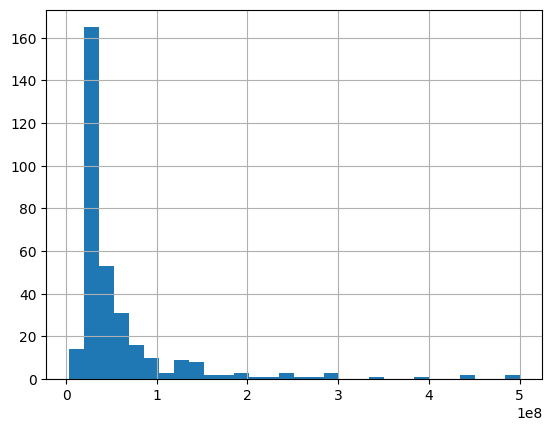

In [267]:
df_state['state_money'].hist(bins=30)

Средняя сумма, которая выделялась государством на поддержку фильмов - 35 млн.р. (в соответсвии с медианой)
Лишь 25% фильмов получили поддержку свыше 60 млн.р.
Минимальная сумма, которую государство выделяло на фильм с 2013 по 2019 года - 3 млн.р. Максимальная - 500 млн.р.

Как распределена поддержка между Фондом Кино и Министерством Культуры.

In [268]:
df_state.pivot_table(index='financing_source', values='state_money', aggfunc=['count', 'median'])


,count,median
,state_money,state_money
financing_source,,
None,0,NaN
МК,164,28000000.0
"МК, ФК",22,47751149.5
ФК,146,60000000.0


Чаще всех выделяло средства Министерство Культуры. Реже всего фильмы получали подержку из обеих источников.
Фонд Кино в среднем выдялял в два раза больше денег на поддержку фильмов, нежели Министерство Культуры (60 млн.р. против 28 млн.р.).
Совместно они выделяли в среднем немногим меньше, чем Фонд Кино - 47,7 млн.р.

Какую долю в среднем составляют государственные средства в общем бюджете фильма.

In [269]:
df_state['support_ratio'].describe()

count    332.000000
mean       0.542169
std        0.196938
min        0.040000
25%        0.380000
50%        0.615000
75%        0.660000
max        1.000000
Name: support_ratio, dtype: float64

Посмотрим на распределение доли государственных денег в общем бюджете фильма

C:\Users\user\AppData\Local\Temp\ipykernel_12004\916291818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_state['support_ratio'], bins=30)


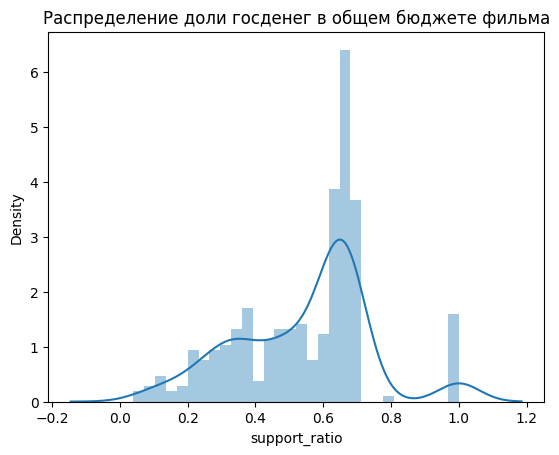

In [270]:
sns.distplot(df_state['support_ratio'], bins=30)
plt.title('Распределение доли госденег в общем бюджете фильма')
plt.show()

В среднем, в фильмах, которые получили господдержку, доля государственных денег в общем бюджете составляет 61,5% (в соответсвии с медианой).
Максиальная доля составила 100%, минимальная - 4%

Зависит ли сумма сборов от размера государственной поддержки?

Чтобы посмотреть взаимосвязь количественных факторов с количественными, нам необходимо будет очистить данные в столбцах box_office 

Для этого cоздадим функцию, которая будет принимать на вход столбец, а на выходе выдавать минимальный и макисмальные пороги.
Таким образом мы сможем увидеть максимальные и минимальные значения, которые будут исключать выбросы.

In [271]:
def min_max(date):
    q1 = date.quantile(.25)
    q3 = date.quantile(.75)
    iqr = q3-q1
    min_box = (q1-1.5*iqr if q1-1.5*iqr > date.min() else date.min())
    max_box = (q3+1.5*iqr if q1+1.5*iqr < date.max() else date.min())
    return round(min_box,1), round(max_box,1)

Определим границы для столбца box_office в датафрейме df_cinema_s

In [272]:
min_box, max_box = min_max(df_cinema_s['box_office'])
min_box, max_box

(1550.0, 264077507.4)

Определим границы для столбца state_money

In [273]:
min_st, max_st = min_max(df_cinema_s['state_money'])
min_st, max_st

(4700000, 111000000.0)

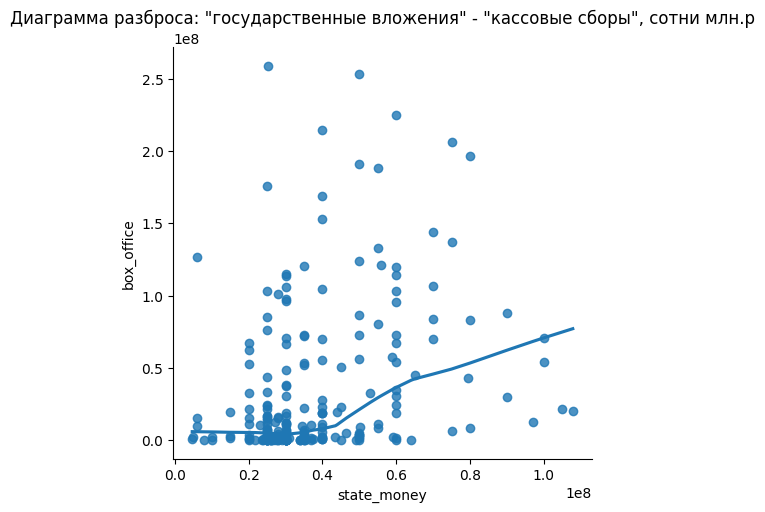

In [274]:
box_office_filter = '(@min_box <= box_office <= @max_box) and (@min_st <= state_money <= @max_st)'

sns.lmplot(data=df_cinema_s
           .query(box_office_filter), 
           x='state_money', 
           y='box_office',
           lowess=True);
plt.title('Диаграмма разброса: "государственные вложения" - "кассовые сборы", сотни млн.р');

На диаграмме наблюдается высокий разброс значений. Линейная зависимость начинает проследиваться с момента, когда величина инвестированных государством средств превышает 40млн.р, однако теснота этой связи крайне мала.

Корреляция между сборами, и количеством профинансированных государством денег отсутствует

Существует ли зависимость величины кассовых сборов от размера бюджета фильма.

Text(0.5, 1.0, 'Диаграмма размаха для столбца "Бюджет"')

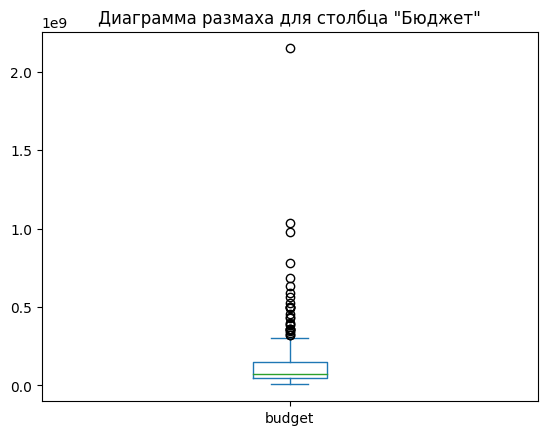

In [275]:
df_cinema_s.budget.plot.box()
plt.title('Диаграмма размаха для столбца "Бюджет"')

Почистим его также от выбросов.

Определим границы для столбца budget в датафрейме data_gov_cinema

In [276]:
min_budget, max_budget = min_max(df_cinema_s.budget)
min_budget, max_budget

(6000000, 305785290.0)

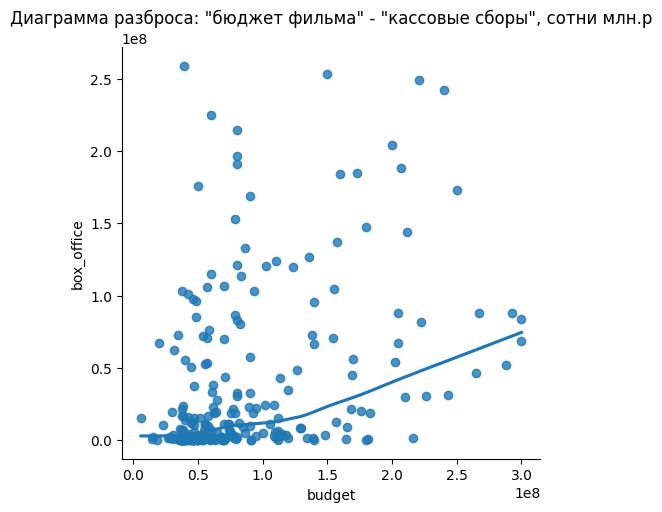

In [277]:
box_office_budget_filter = '(@min_box <= box_office <= @max_box) and (@min_budget <= budget <= @max_budget)'

sns.lmplot(data=df_cinema_s.query(box_office_budget_filter), 
           x='budget', 
           y='box_office',
           lowess=True);
plt.title('Диаграмма разброса: "бюджет фильма" - "кассовые сборы", сотни млн.р');

Можно сказать, что линейная зависимость появляется, когда бюджет фильма становится свыше 100млн.р. Однако теснота это связи настолько мала, что мы не можем говорить о наличии корреляции.

Какой рейтинг в среднем получают фильмы, которые получили поддержку от государства. Отличается ли он от среднего рейтинга фильмов, не получивших поддержки государства?

In [278]:
df_state.ratings.describe()

count    314.000000
mean       6.000637
std        1.123948
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [279]:
df_nstate.ratings.describe()

count    6176.000000
mean        6.503578
std         1.095038
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.200000
Name: ratings, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_12004\2229374572.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_state.ratings, hist_kws={'alpha': 0.5}, color='g', bins=20, label='C поддержкой государства')
C:\Users\user\AppData\Local\Temp\ipykernel_12004\2229374572.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

Text(0.5, 1.0, 'Рейтинг фильмов с поддержкой государства, а также без нее')

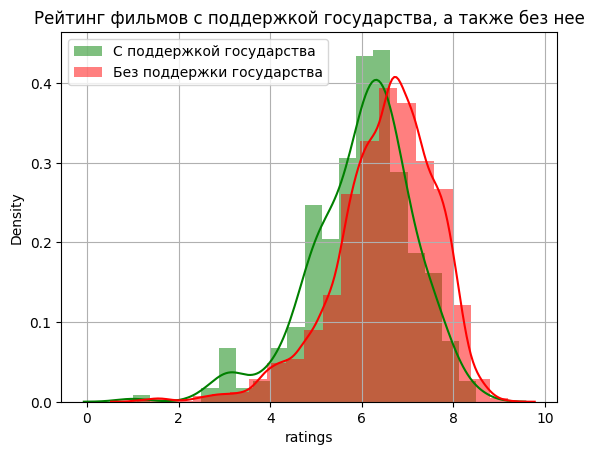

In [280]:
fig, ax = plt.subplots()

sns.distplot(a=df_state.ratings, hist_kws={'alpha': 0.5}, color='g', bins=20, label='C поддержкой государства')
sns.distplot(a=df_nstate.ratings, hist_kws={'alpha': 0.5}, color='r', bins=20, label='Без поддержки государства')

plt.grid()
plt.legend()
plt.title('Рейтинг фильмов с поддержкой государства, а также без нее')

В качесте показателя рассмотрим среднее арифметическое. Наши распределения напоминают по форме нормальные, с небольшими скосами справа или слева. Взяв за показатели среднее арифметическое, мы можем заложить в результат некоторое отклонение. Плюс, рейтинг - показатель непрерывный. У нас же он указан в виде дискретных значений, поэтому среднее арифметическое в данном случае может быть более информативным.

Средний рейтинг для фильмов, получивших государственное финансирование - 6.0, средний рейтинг для остальных фильмов - 6.5.
Мы не можем утверждать, что разница статистически значима, но она есть.

Влияет ли бюджет фильма на его рейтинг?

Посмотрим на диаграмму рассеяния для столбца budget датафрейма state_money

Text(0.5, 1.0, 'Диаграмма разброса для столбца "Бюджет"')

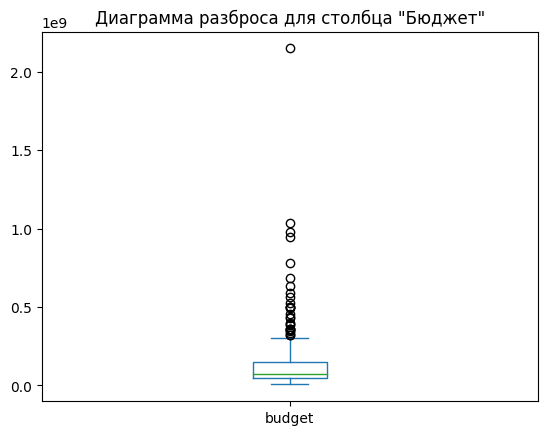

In [281]:
df_state.budget.plot.box()
plt.title('Диаграмма разброса для столбца "Бюджет"')

In [282]:
min_budget, max_budget = min_max(df_state.budget)
min_budget, max_budget

(6000000, 306712800.8)

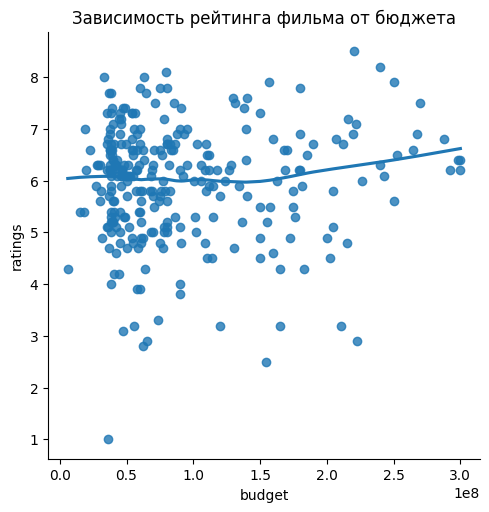

In [283]:
sns.lmplot(data=df_state.query('@min_budget <= budget <= @max_budget'), 
           x='budget', y='ratings', lowess=True);
plt.title('Зависимость рейтинга фильма от бюджета');

Высокий разброс значений на диаграмме рассеяния, линия регрессии практически паралельна оси Х.
Все это говорит о том, что между рейтингом фильма и бюджетом нет линейной зависимости

Влияет ли количество денег, вложеных государством на рейтинг фильма?

Text(0.5, 1.0, 'Диаграмма разброса для столбца "Государственные деньги"')

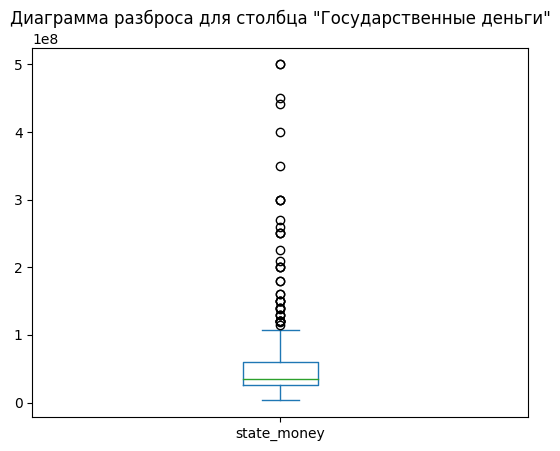

In [284]:
df_state.state_money.plot.box()
plt.title('Диаграмма разброса для столбца "Государственные деньги"')

In [285]:
min_state_money, max_state_money = min_max(df_state.state_money)
min_state_money, max_state_money

(3000000, 111999375.0)

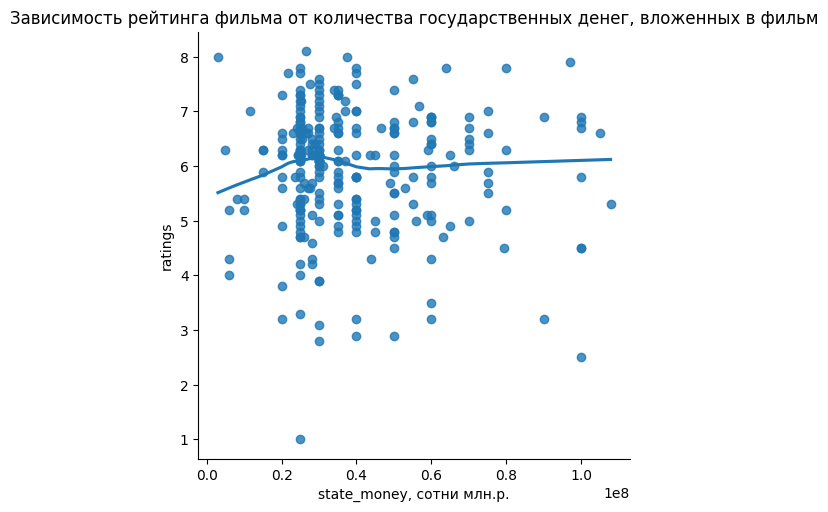

In [286]:
sns.lmplot(data=df_state.query('@min_state_money <= state_money <= @max_state_money'), 
           x='state_money', y='ratings', lowess=True);
plt.title('Зависимость рейтинга фильма от количества государственных денег, вложенных в фильм');
plt.xlabel('state_money, сотни млн.р.');

Рейтинг не зависит от вложенных государством денег.

Влияет ли доля государственных денег в бюджете фильма на его рейтинг?

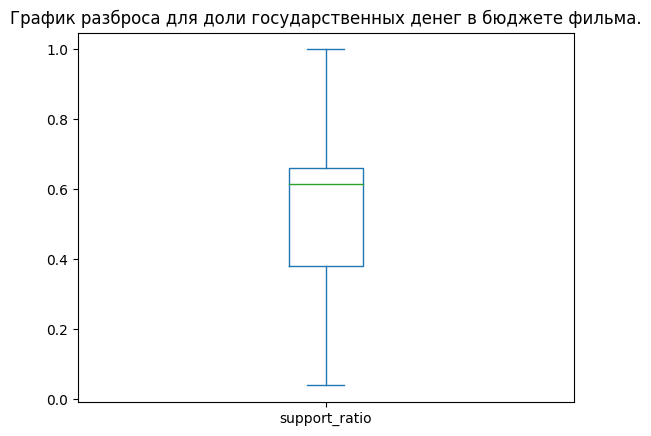

In [287]:

df_state.support_ratio.plot.box();
plt.title('График разброса для доли государственных денег в бюджете фильма.');

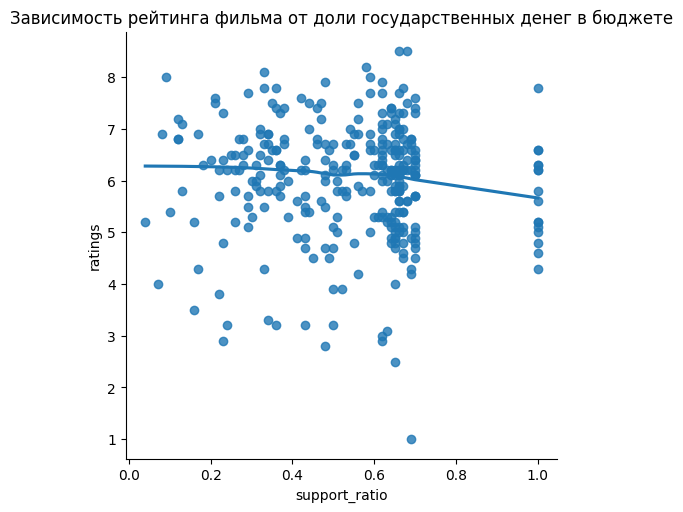

In [288]:
sns.lmplot(data=df_state, 
           x='support_ratio', y='ratings', lowess=True);
plt.title('Зависимость рейтинга фильма от доли государственных денег в бюджете');

Вновь наблюдаем высокий разброс значений и линию регрессии практически паралельную оси Y, что в совокупности говорит об отсутствии линейной связи между рейтингом фильма и доле государственных денег в его бюджете.

In [289]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office',
       'show_start_year', 'f_genre', 'f_director', 'support_ratio',
       'box_office_na', 'state_money'],
      dtype='object')

### Шаг 5. Напишите общий вывод

В ходе работы были предприняты следующие шаги:

* Была осуществлена предобработка данных
* Были добавлены новые признаки, рассчитанные на основании имеющихся данных
* Был произведен исследовательский анализ данных в целом
* Был произведен исследовательский анализ данных в отношении фильмов, получивших материальную поддежрку от Фонда Кино и Министерства Культуры.

В ходе предобработки данных, мы:

- Объединили данные из разных таблиц в одну
- Изменили формат хранения данных в стобцах, в которых это было необходимо
- Изучили пропуски в данных, попытались понять их причины, а также подобрать замену пропускам там, где это было целесообразно.
- Изучили дубликаты в данных, попытались понять их причины, а также избавились от дубликатов там, где это было возможно и необходимо для целей текущего исследования.
- Изучили категориальные и количественные значения на предмет аномалий. Поправили значения там, где это было возможно.

На этапе добавления новых признаков, были добавлены следующие столбцы:

- show_start_year - год, когда фильм вышел в прокат.
- f_director - имя и фамилия главного режиссера
- f_genre - основной жанр кинокартины
- support_ratio - доля денег государственной поддержки в общем бюджете фильма

На этапе общего исследовательского анализа данных, мы изучили динамику выхода фильмов в прокат, сборы. Были получены следующие результаты:

- В целом, несмотря на небольшие перепады, фильмы на протяжении 2010 - 2019 годов выходили равномерно. С 2010 по 2019 года в среднем в прокат выходило 749 фильмов ежегодно.
- Наибольшее количество кинолент вышло в прокат в 2010 году и составило 985 фильмов. Меньше всего кинокартин российский прокат увидел в 2017 году - их количестов составило всего лишь 505 фильмов.
- Максимальные сборы в период с 2015 по 2019 года получили фильмы, выпущенные в прокат в кинотеатрах в 2018 году. Минимальные сборы получили фильмы, выпущенные в 2015 году. 

Что касается влияния возрастного ограниченения на кассовые сборы фильмов, было установлено, что влияние присутсвует. Было выявлено, что:

- Максимальное количество сборов за год получили кинокартины с возрастным ограничением "16+". 
- Минимальное количество сборов в среднем на фильм получили картины с возрастным ограничением "0+". 

На этапе исследовательского анализа фильмов, получивших государственную поддержку, были изучены кассовые сборы, сумма вложенных средств, степень их возврата, а также рейтинг таких фильмов и его взаимозависимость от различных факторов в период с 2013 по 2019 года. Были получены следующие результаты:

- Наибольшее количество картин получило поддержку государства в 2015 году и составило 86 фильмов. 
- Наименьшее количество получило финансирование в 2013 году и составило 2 фильма.
- В среднем государство выделяло 35 млн.р. на один фильм (в соответсвии с медианой). Лишь 25% фильмов получили поддержку свыше 60 млн.р. При этом, диапазон сумм, которые государство ввыделяло на финансирование фильмов с 2013 по 2019 года составил от 3 до 500 млн.р.
- Средняя доля государственных средств в общем бюджете фильма составила 61,5%. Минимальная доля составила 4%, в то время как максимальная - 100%.


Было выявлено, что корреляция между сборами, и количеством профинансированных государством денег, а также размером бюджета фильма - отсутствует. Точнее, в некоторой степени на определенных отрезках она присутсвует и является положительной, но теснота связи настолько слаба, а разброс значений настолько высок - что скорее было бы верно говорить об ее отсутствии.

Что касается рейтинга фильмов, получивших государственную поддержку, а также его взаимосвязи с другими признаками:

- Средний рейтинг для фильмов, получивших государственное финансирование составляет 6.0. Средний рейтинг для фильмов, не получивших государственной поддержки немногим выше - 6.5 Мы не можем утверждать, что различие статистически значимо, но оно присутсвует.
- Ни бюджет, ни размер государственного финансирования, ни доля государственных денег в общем бюджете фильма не коррелируеют с рейтингом, который получил фильм.